In [1]:
import pandas as pd
import ast
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt


# Loading Data
datasets=load_dataset('lukebarousse/data_jobs')
df=datasets['train'].to_pandas()


# Data Cleanup
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda skill_list:ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

c:\Users\shabi\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_us=df[df['job_country']=='United States'].dropna(subset=['salary_year_avg'])

In [3]:
job_titles=df_us['job_title_short'].value_counts().index[:6].tolist()
job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [4]:
df_us_top6=df_us[df_us['job_title_short'].isin(job_titles)]

In [5]:
job_order=df_us_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

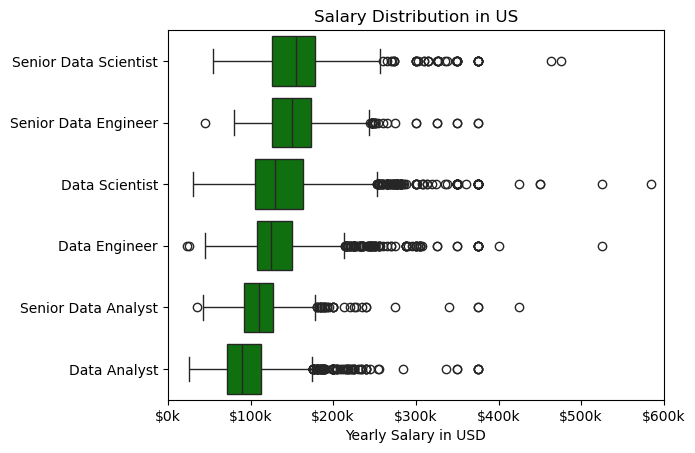

In [6]:
sns.boxplot(data=df_us_top6,x='salary_year_avg',y='job_title_short',color='green',order=job_order)
plt.title('Salary Distribution in US')
plt.xlabel('Yearly Salary in USD')
plt.xlim(0,600000)
plt.ylabel('')
ticks_x=plt.FuncFormatter(lambda x,pos:f'${int(x/1000)}k')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

#### Investigate Median Salary Vs Skill for Data Analysts

In [14]:
df_da_us=df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')].copy()
df_da_us=df_da_us.dropna(subset=['salary_year_avg'])

In [19]:
df_da_us=df_da_us.explode('job_skills')
df_da_us[['salary_year_avg','job_skills']].head()

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [28]:
df_da_top_pay=df_da_us.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='median',ascending=False).head(10)

df_da_top_pay

,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


In [31]:
df_da_skills=df_da_us.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count',ascending=False).head(10)

df_da_skills=df_da_skills.sort_values(by='median',ascending=False)
df_da_skills

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


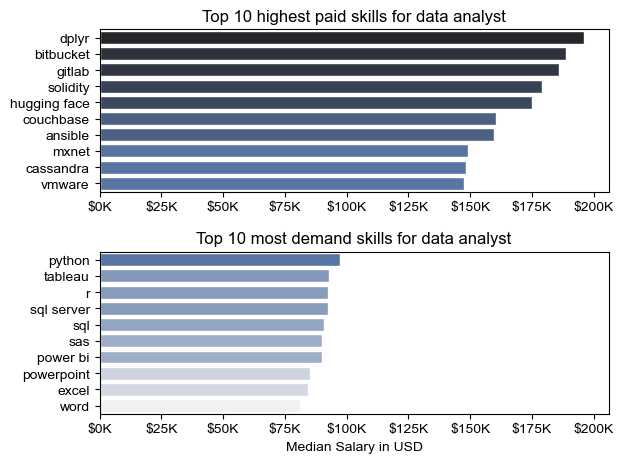

In [32]:

fig,ax=plt.subplots(2,1)
sns.set_theme(style='ticks')
#df_da_top_pay.plot(kind='barh',y='median',ax=ax[0],color='green',legend=False)
sns.barplot(data=df_da_top_pay,x='median',y=df_da_top_pay.index,ax=ax[0],
            hue='median',palette='dark:b_r') #dark blue, _r reverse the palette

ax[0].set_title('Top 10 highest paid skills for data analyst')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].legend().remove()
#ax[0].invert_yaxis()
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_:f'${int(x/1000)}K'))
##
#df_da_skills[::-1].plot(kind='barh',y='median',ax=ax[1],color='brown',legend=False)
#slicer used to reverse. to show that we can use it in two ways
sns.barplot(data=df_da_skills,x='median',y=df_da_skills.index,ax=ax[1],
            hue='median',palette='light:b')
ax[1].set_title('Top 10 most demand skills for data analyst')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary in USD')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].legend().remove()
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_:f'${int(x/1000)}K'))
fig.tight_layout()